In [1]:
%load_ext autoreload
%aimport gempipe, gempipe.interface, gempipe.interface.sanity, gempipe.interface.gaps, gempipe.interface.medium, gempipe.interface.clusters
%autoreload 1

In [2]:
import gempipe
import pandas as pnd

In [26]:
report = pnd.read_csv('gempipe/output_derive/derive_strains.csv', index_col=0)
report = report.rename(columns={'species':  'subsp.'})

# import binary feature tables:
biosynth = pnd.read_csv('gempipe/output_derive/biosynth.csv', index_col=0)
rpam = pnd.read_csv('gempipe/output_derive/rpam.csv', index_col=0)
feats = pnd.concat([biosynth, rpam], axis=0)


# select interesting metabolites:
feats = feats.loc[[
    'thf_c',  # vitamin B9  (tetrahydrofolate)
    'adeadocbl_c',  # vitamin B12
    '3hppnl_c',   # reuterin (3-hydroxypropanal)
    'hista_c',   # histamine (HISDC)
    'UREA',  # conversion urea → co2 + nh4
], :]
feats

,GCA_003061685.1,GCA_948704115.1,GCA_000722535.2,GCA_949444415.1,GCA_002254165.1,GCA_958455065.1,GCA_020784715.1,GCA_948734535.1,GCA_020785015.1,GCA_020785895.1,...,GCA_003175125.1,GCA_948485395.1,GCA_009389465.1,GCA_000016825.1,GCA_025515425.1,GCA_001046835.1,GCA_020784555.1,GCA_020785595.1,GCA_948485015.1,GCA_948692985.1
thf_c,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
adeadocbl_c,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,...,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN
3hppnl_c,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
hista_c,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
UREA,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
ppa_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4abut_c,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


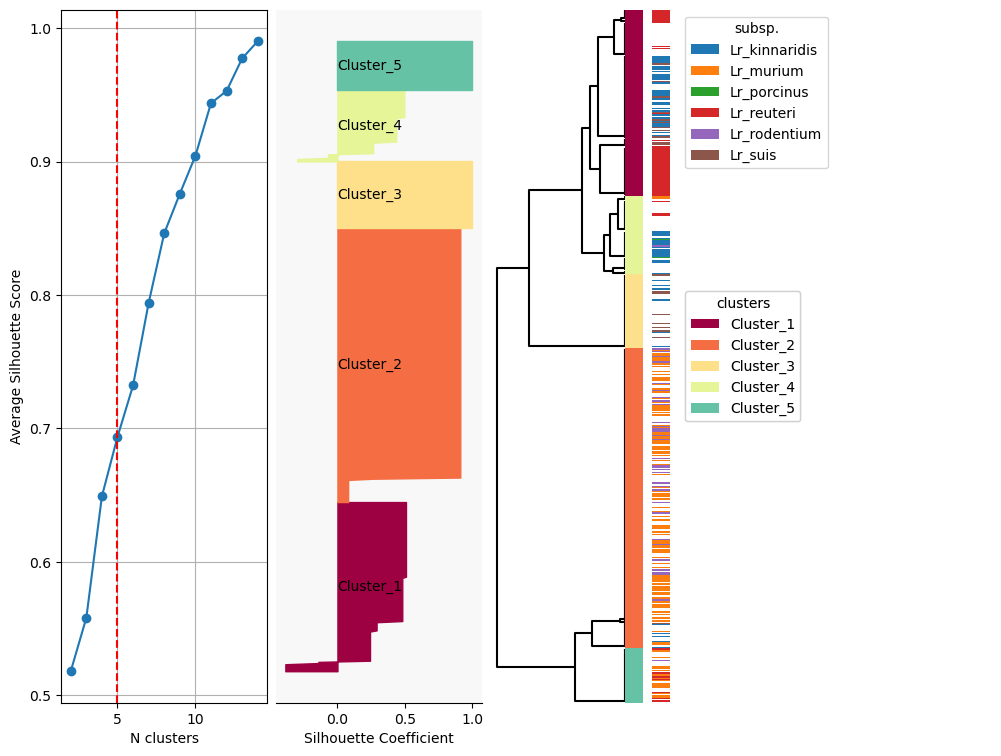

In [28]:
fig, acc_to_cluster, cluster_to_color = gempipe.silhouette_analysis( 
    figsize = (12,9), forcen=5, ctotest=range(2,15,1), 
    derive_report=report, report_key='subsp.', excludekeys=['other_Lr'],
    tables={'presence': feats}, 
)

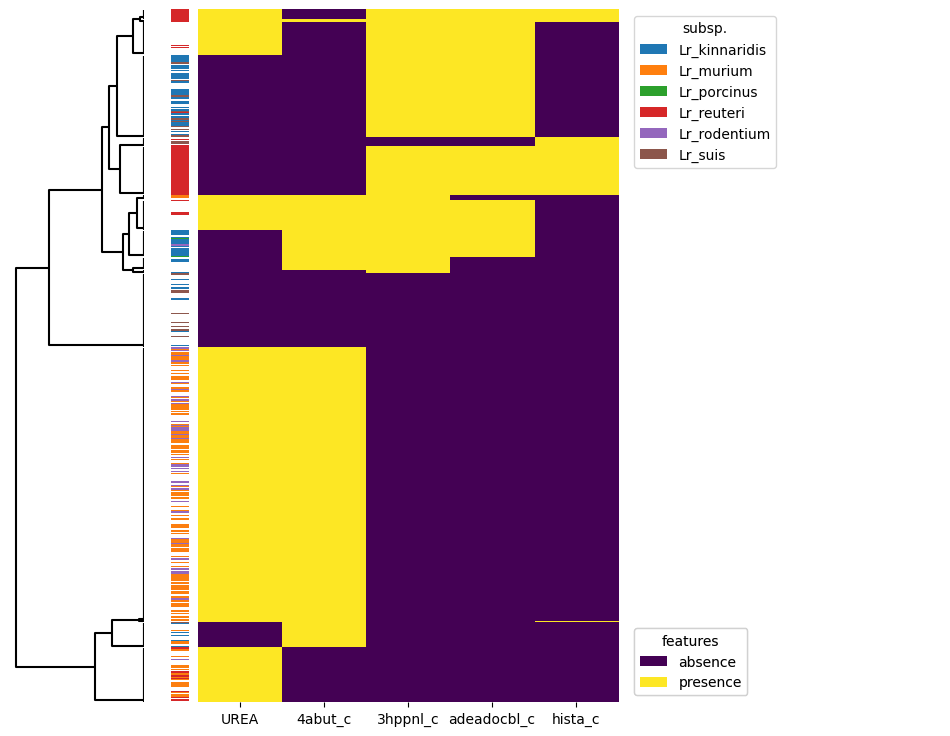

In [29]:
fig, ord_data_bool = gempipe.heatmap_multilayer(
    figsize = (12,9),  
    derive_report=report, report_key='subsp.', excludekeys=['other_Lr'],
    tables={'presence': feats},  xlabels=True,
)